In [1]:
import numpy as np

force_data = np.load('data/GroundLink_dataset/force/s001_force/s001/s001_20220513_chair_1.npy', allow_pickle=True).item()

c3d_path = 'data/GroundLink_dataset/mocap/s001_20220513/s001_20220513_chair_1.c3d'
grf_path = 'data/GroundLink_dataset/force/s001_force/s001/s001_20220513_chair_1.npy'

cop = force_data['CoP']
grf = force_data['GRF']# * 685.3266

cop.shape # (framecount, 2, 3)
grf.shape # (framecount, 2, 3)

torch.Size([5397, 2, 3])

In [2]:
import ezc3d

c3d = ezc3d.c3d('data/GroundLink_dataset/mocap/s001_20220513/s001_20220513_chair_1.c3d')
c3d.keys() # ['header', 'parameters', 'data']
c3d['data'].keys() # ['points', 'meta_points', 'analogs', 'rotations']
c3d['data']['points'].shape # (4,99,framecount)

# c3d['data']['points'][3] is all 1's so not useful

(4, 99, 5397)

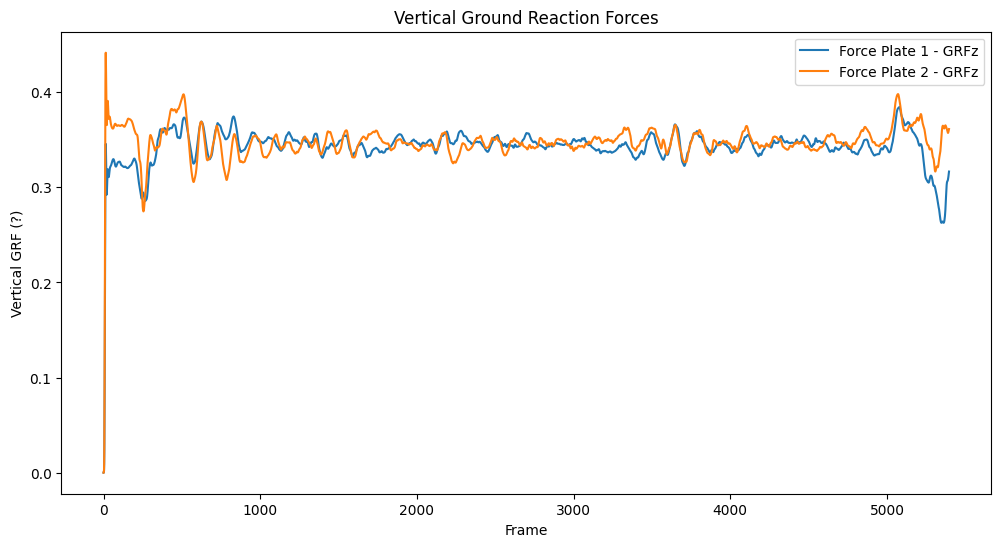

In [3]:
import matplotlib.pyplot as plt

# Plot the vertical GRF (z-component) for both force plates
plt.figure(figsize=(12, 6))
plt.plot(grf[:, 0, 2].numpy(), label='Force Plate 1 - GRFz')
plt.plot(grf[:, 1, 2].numpy(), label='Force Plate 2 - GRFz')
plt.xlabel('Frame')
plt.ylabel('Vertical GRF (?)')
plt.title('Vertical Ground Reaction Forces')
plt.legend()
plt.show()

In [13]:
c3d['parameters']['SEG']

{'__METADATA__': {'DESCRIPTION': 'Seg data parameters', 'IS_LOCKED': False},
 'PRED_ERROR': {'type': 4,
  'description': 'Maximum predictor error',
  'is_locked': False,
  'value': array([25.])},
 'MAX_RESID': {'type': 4,
  'description': 'Max residuals',
  'is_locked': False,
  'value': array([6.])},
 'ACC_FACTOR': {'type': 4,
  'description': 'Segment starting acceleration',
  'is_locked': False,
  'value': array([50000.])},
 'NOISE_FACTOR': {'type': 4,
  'description': 'Segment starting noise factor',
  'is_locked': False,
  'value': array([10.])},
 'DATA_LIMITS': {'type': 4,
  'description': 'Measurement volume limits',
  'is_locked': False,
  'value': array([[-797.53045654,   29.19573212,  973.36206055],
         [ 252.99125671,   72.35431671, 1668.69360352]])}}